# Predictive Modelling on Mortgage Backed Securities Using Supervised Machine Learning

#### "Task": predict the mortgage backed securities prepayment risk using machine leaning models.

### "Description of the data:"
The data is obtained from Freddie Mac official portal for home loans, it contains 291452 data points and 28 columns or parameters which denote different features as follows:

`CreditScore`: Borrower's credit score at the time of loan origination.

`FirstPaymentDate`: Date of the first scheduled mortgage payment.

`FirstTimeHomebuyer`: Indicates if the borrower is a first-time homebuyer.

`MaturityDate`: Date when the loan is scheduled to be fully paid off.

`MSA`: Metropolitan Statistical Area code of the property.

`MIP`: Mortgage Insurance Premium, if applicable.

`Units`: Number of units in the property (e.g., single-family, duplex, etc.).

`Occupancy`: Occupancy status of the property (e.g., owner-occupied, investment, etc.).

`OCLTV`: Original Combined Loan-to-Value ratio, which considers all loans on the property.

`DTI`: Debt-to-Income ratio of the borrower.

`OrigUPB`: Original unpaid principal balance of the loan.

`LTV`: Loan-to-Value ratio at the time of loan origination.

`OrigInterestRate`: Original interest rate of the loan.

`Channel`: Origination channel (e.g., retail, broker, correspondent, etc.).

`PPM`: Indicates if the loan has a prepayment penalty.

`ProductType`: Type of mortgage product (e.g., fixed-rate, adjustable-rate, etc.).

`PropertyState`: State code where the property is located.

`PropertyType`: Type of property (e.g., single-family, condominium, etc.).

`PostalCode`: Zip code of the property.

`LoanSeqNum`: Unique loan sequence number.

`LoanPurpose`: Purpose of the loan (e.g., purchase, refinance, etc.).

`OrigLoanTerm`: Original term of the loan in months.

`NumBorrowers`: Number of borrowers on the loan.

`SellerName`: Name of the entity that sold the loan to Freddie Mac.

`ServicerName`: Name of the entity servicing the loan.

`EverDelinquent`: Indicates if the borrower has ever been delinquent on the loan.

`MonthsDelinquent`: Number of months the borrower has been delinquent, if applicable.

`MonthsInRepayment`: Number of months the borrower has been in repayment.




In [1]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
from scipy.stats import zscore

#preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.decomposition import PCA


#modeling 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

<Figure size 720x576 with 0 Axes>

In [2]:
# load data 
df = pd.read_csv("LoanExport.csv")

C:\Users\nsaad\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Exploratory Data Analysis (EDA)

In [3]:
df

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,199903,N,202902,37964,0,1,O,60,32,...,19400,F199Q1220925,N,360,2,Ot,Other servicers,0,0,12
291447,840,200210,N,202904,35644,0,1,O,73,0,...,11600,F199Q1401332,P,319,2,Ot,Other servicers,0,0,53
291448,840,200304,N,202904,42044,0,1,O,73,31,...,92800,F199Q1401282,N,313,1,Ot,Other servicers,0,0,38
291449,845,199904,N,202903,37964,0,1,I,80,54,...,19300,F199Q1220924,P,360,2,Ot,Other servicers,0,0,32


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [5]:
df.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


In [6]:
#list of all the categoric columns
cat = df.select_dtypes('object').columns.to_list()
#list of all the numeric columns
num = df.select_dtypes('number').columns.to_list()

##### from variables definition a certain intervals in `LTV`, `DTI`, `OCLTV` and `CreditScore` columns were given so we will transform values outside of these intervals to NaN 

In [7]:
# create a boolean mask to identify values to be replaced
LTV_mask = (df['LTV'] < 1) | (df['LTV'] > 998)
DTI_mask = (df['DTI'] < 1) | (df['DTI'] > 65)
CreditScore_mask = (df['CreditScore'] < 300) | (df['CreditScore'] > 850)

# replace values with NaN using loc accessor and boolean mask
df.loc[LTV_mask, 'LTV'] = np.nan
df.loc[LTV_mask, 'OCLTV'] = np.nan
df.loc[DTI_mask, 'DTI'] = np.nan
df.loc[CreditScore_mask, 'CreditScore'] = np.nan

df.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,290262.000000,291451.000000,291451.000000,291451.000000,291451.000000,291446.000000,273655.000000,291451.000000,291446.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,711.841009,199904.760553,202902.367043,9.216685,1.026022,76.961849,31.986552,124940.387921,76.939306,6.926547,359.835375,0.197848,1.837729,60.805291
std,51.300353,13.821228,16.090508,12.648273,0.202986,15.232949,11.099983,53657.440624,15.222094,0.343541,2.286939,0.398378,8.809392,46.142599
min,335.000000,199901.000000,202402.000000,0.000000,0.000000,6.000000,1.000000,8000.000000,6.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,676.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,24.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,32.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


In [8]:
# check unique values in categorical cols 
[df[category].value_counts() for category in cat[1:]]

[X        39100
 31084     9338
 16974     8771
 12060     6985
 47644     6673
          ...  
 21940        3
 49500        2
 32420        1
 10380        1
 25020        1
 Name: MSA, Length: 392, dtype: int64,
 O    276131
 I      8734
 S      6586
 Name: Occupancy, dtype: int64,
 T    167670
 R    123219
 C       407
 B       155
 Name: Channel, dtype: int64,
 N    282125
 X      5405
 Y      3921
 Name: PPM, dtype: int64,
 FRM      291451
 Name: ProductType, dtype: int64,
 CA    43327
 FL    19133
 MI    16285
 IL    13621
 TX    13092
 OH    11545
 CO    10127
 GA    10024
 NC     9983
 WA     9927
 AZ     9248
 VA     8096
 NY     7913
 PA     7738
 NJ     7457
 OR     6658
 MA     6392
 IN     6228
 MD     5515
 MO     5400
 MN     5092
 UT     4996
 WI     4660
 TN     4556
 SC     4473
 AL     4128
 KY     3896
 NV     3564
 CT     3253
 KS     2321
 ID     2296
 LA     2092
 NM     2053
 IA     1860
 OK     1803
 NE     1532
 NH     1320
 VT      945
 AR      938
 MS      

In [9]:
df['FirstTimeHomebuyer'].unique()

array(['N', 'X', 'Y'], dtype=object)

#### since `MSA` & `FirstTimeHomebuyer`  contain a lot of X values which indicates of not available we may create and deal with it as a new category for example "missing" 

In [10]:
df['MSA'] = df['MSA'].replace('X    ', 'Missing')
df['FirstTimeHomebuyer'] = df['FirstTimeHomebuyer'].replace('X', 'Missing')

##### for `PPM`,`PropertyType` and `NumBorrowers` we will replace it with NaN to make it easier to handle later


In [11]:
df['PPM'] = df['PPM'].replace('X', np.nan)
df['PropertyType'] = df['PropertyType'].replace('X', np.nan)
df['NumBorrowers'] = df['NumBorrowers'].replace('X ', np.nan)

##### Check Nulls 


In [12]:
df.isnull().sum()

CreditScore            1189
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     5
DTI                   17796
OrigUPB                   0
LTV                       5
OrigInterestRate          0
Channel                   0
PPM                    5405
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers            339
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

##### Check Duplicates

In [13]:
df.duplicated().sum()

0

#### Check Outliers

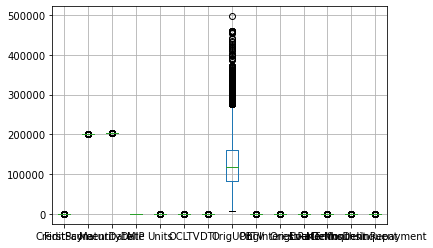

In [14]:
df.boxplot()
plt.show()

<AxesSubplot:>

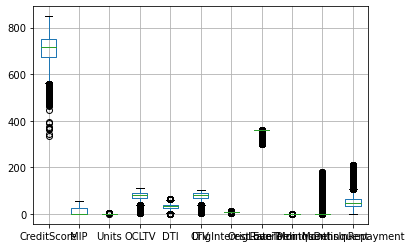

In [15]:
df_temp = df.drop(['OrigUPB','FirstPaymentDate','MaturityDate'], axis=1)
df_temp.boxplot()

### Columns that contains noticable outliers are:
1. OrigUPB 
2. CreditScore
3. OCLTV 
4. LTV
5. OrigLoanTerm
6. MonthsInRepayment

### Univariate Analysis

C:\Users\nsaad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

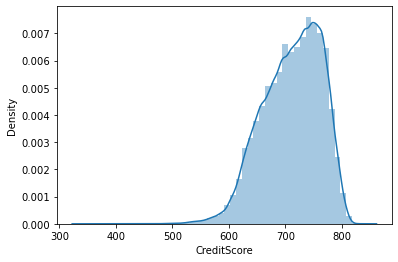

In [16]:
sns.distplot(df['CreditScore'])

C:\Users\nsaad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MIP', ylabel='Density'>

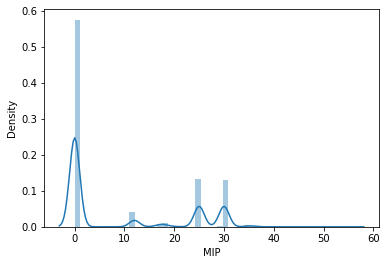

In [17]:
sns.distplot(df['MIP'])

C:\Users\nsaad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Units', ylabel='Density'>

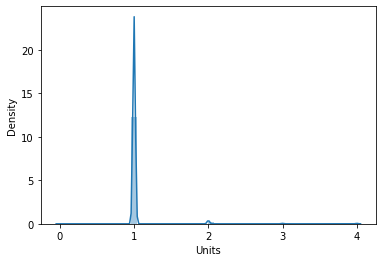

In [18]:
sns.distplot(df['Units'])

C:\Users\nsaad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='OCLTV', ylabel='Density'>

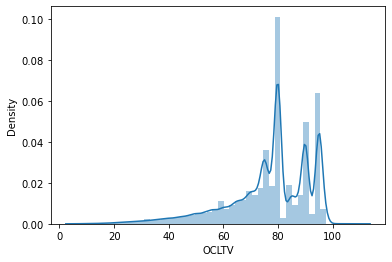

In [19]:
sns.distplot(df['OCLTV'])

C:\Users\nsaad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DTI', ylabel='Density'>

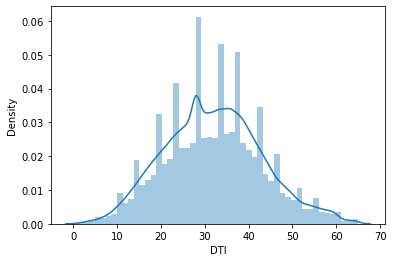

In [20]:
sns.distplot(df['DTI'])

C:\Users\nsaad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='OrigUPB', ylabel='Density'>

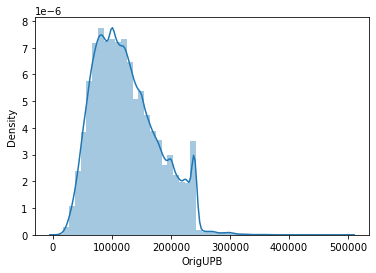

In [21]:
sns.distplot(df['OrigUPB'])

C:\Users\nsaad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LTV', ylabel='Density'>

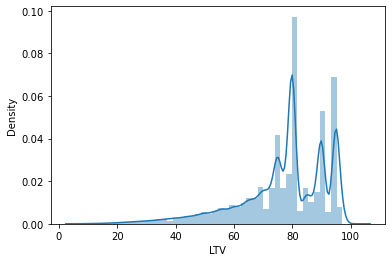

In [22]:
sns.distplot(df['LTV'])

C:\Users\nsaad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='OrigInterestRate', ylabel='Density'>

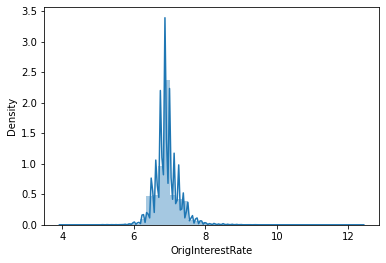

In [23]:
sns.distplot(df['OrigInterestRate'])

C:\Users\nsaad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EverDelinquent', ylabel='Density'>

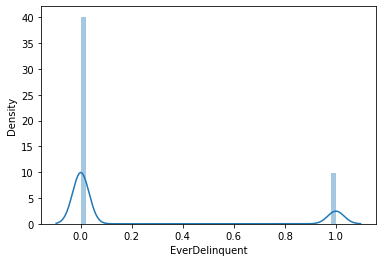

In [24]:
sns.distplot(df['EverDelinquent'])

C:\Users\nsaad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthsDelinquent', ylabel='Density'>

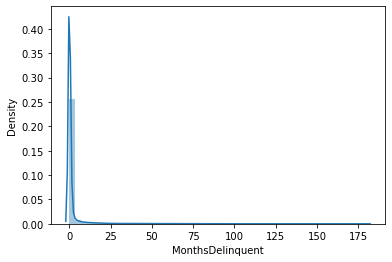

In [25]:
sns.distplot(df['MonthsDelinquent'])

C:\Users\nsaad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthsInRepayment', ylabel='Density'>

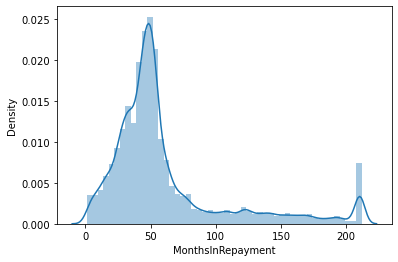

In [26]:
sns.distplot(df['MonthsInRepayment'])

C:\Users\nsaad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FirstTimeHomebuyer', ylabel='count'>

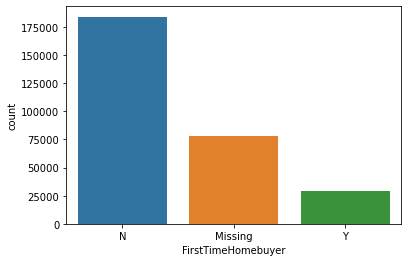

In [27]:
sns.countplot(df['FirstTimeHomebuyer'])

C:\Users\nsaad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MSA', ylabel='count'>

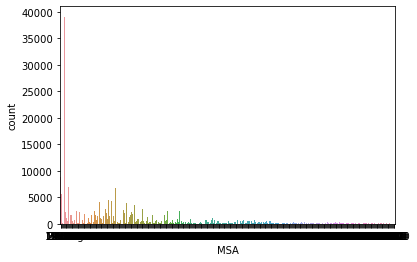

In [28]:
sns.countplot(df['MSA'])

C:\Users\nsaad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupancy', ylabel='count'>

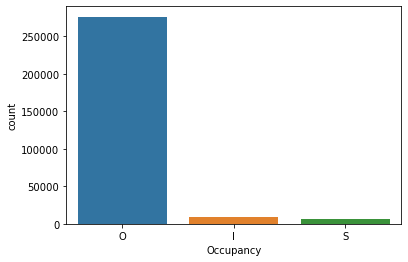

In [29]:
sns.countplot(df['Occupancy'])

C:\Users\nsaad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Channel', ylabel='count'>

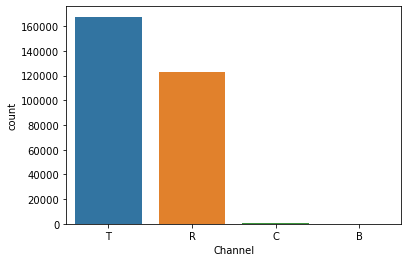

In [30]:
sns.countplot(df['Channel'])

C:\Users\nsaad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PPM', ylabel='count'>

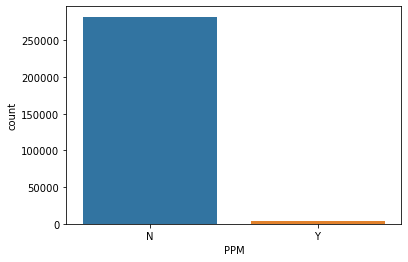

In [31]:
sns.countplot(df['PPM'])

C:\Users\nsaad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ProductType', ylabel='count'>

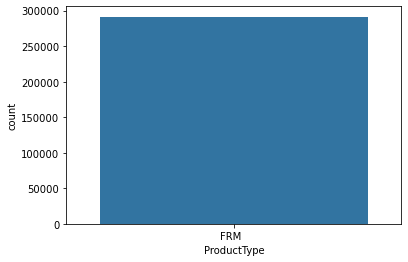

In [32]:
sns.countplot(df['ProductType'])

C:\Users\nsaad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PropertyState', ylabel='count'>

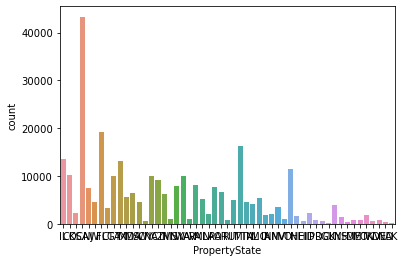

In [33]:
sns.countplot(df['PropertyState'])

C:\Users\nsaad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PropertyType', ylabel='count'>

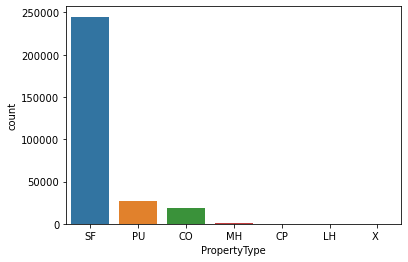

In [34]:
sns.countplot(df['PropertyType'])

C:\Users\nsaad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanPurpose', ylabel='count'>

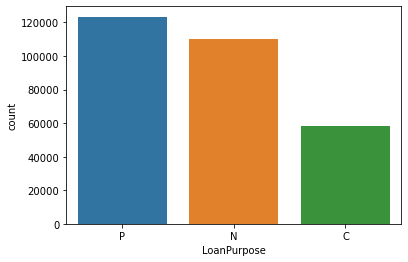

In [35]:
sns.countplot(df['LoanPurpose'])

C:\Users\nsaad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumBorrowers', ylabel='count'>

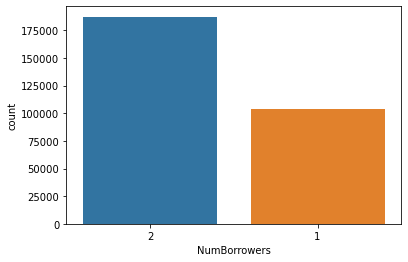

In [36]:
sns.countplot(df['NumBorrowers'])

C:\Users\nsaad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ServicerName', ylabel='count'>

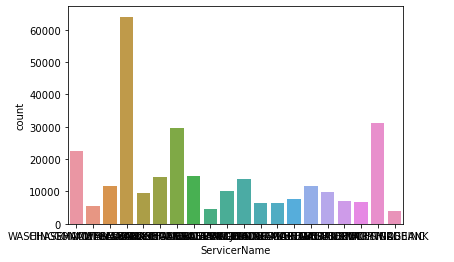

In [37]:
sns.countplot(df['ServicerName'])

##### Actions that will be done based on the above charts:
1. `SellerName` && `ProductType` && `LoanSeqNum` will be dropped as they do not contain beneficial info for me
2. a new column `PropertyLocation` will be derived from  `PostalCode` && `PropertyState` that indicates exact location of property then original columns will be dropped 

### Data Cleaning and Preprocessing

##### Handling missing values

In [60]:
# Mean imputation
df['CreditScore'].fillna(df['CreditScore'].mean(), inplace=True)
df['DTI'].fillna(df['DTI'].mean(), inplace=True)

# Mode imputation
df['PPM'].fillna(df['PPM'].mode()[0], inplace=True)
df['NumBorrowers'].fillna(df['NumBorrowers'].mode()[0], inplace=True)

#drop Nans
df.dropna(subset=['OCLTV'],inplace=True)

In [39]:
df.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24992
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

### Bivariate Analysis

In [40]:
# get correlation matrix
df.corr()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
CreditScore,1.000000,0.015437,0.000282,-0.204527,0.014344,-0.244265,-0.131395,-0.007074,-0.244545,-0.141414,-0.012152,-0.266112,-0.189352,0.001906
FirstPaymentDate,0.015437,1.000000,0.142637,-0.020814,-0.003537,-0.025846,0.009030,0.027327,-0.026004,-0.006575,-0.605949,-0.011887,-0.002251,-0.025415
MaturityDate,0.000282,0.142637,1.000000,-0.002322,0.003169,-0.001788,0.027237,0.015619,-0.002026,0.001854,0.682274,0.001871,0.005766,-0.002971
MIP,-0.204527,-0.020814,-0.002322,1.000000,-0.042113,0.694881,0.084392,0.006716,0.695980,0.124569,0.014835,0.059994,0.051218,-0.087803
Units,0.014344,-0.003537,0.003169,-0.042113,1.000000,-0.046154,0.010789,0.043825,-0.046053,0.074076,0.005348,0.010163,-0.004571,0.025595
OCLTV,-0.244265,-0.025846,-0.001788,0.694881,-0.046154,1.000000,0.111662,0.106204,0.999470,0.095425,0.018570,0.065544,0.059903,-0.094311
DTI,-0.131395,0.009030,0.027237,0.084392,0.010789,0.111662,1.000000,0.098136,0.111401,0.044478,0.015238,0.050942,0.036422,-0.050837
OrigUPB,-0.007074,0.027327,0.015619,0.006716,0.043825,0.106204,0.098136,1.000000,0.105652,-0.128552,-0.008006,-0.067606,-0.067228,-0.211700
LTV,-0.244545,-0.026004,-0.002026,0.695980,-0.046053,0.999470,0.111401,0.105652,1.000000,0.095677,0.018487,0.065751,0.060023,-0.094608
OrigInterestRate,-0.141414,-0.006575,0.001854,0.124569,0.074076,0.095425,0.044478,-0.128552,0.095677,1.000000,0.010792,0.060432,0.051712,-0.120370


#### it seems that there is a high correlation between `LTV` and `OCLTV` and since they are highly correlated we will drop LTV column

###### plot with numerical features

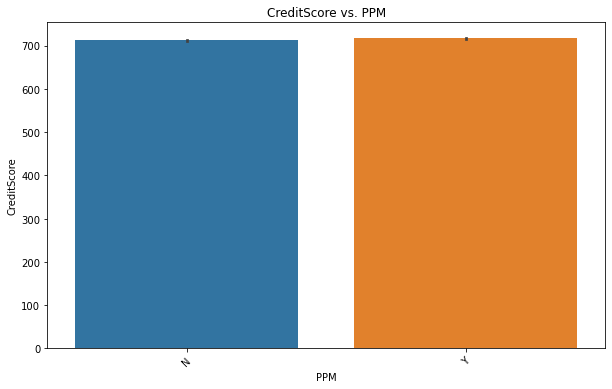

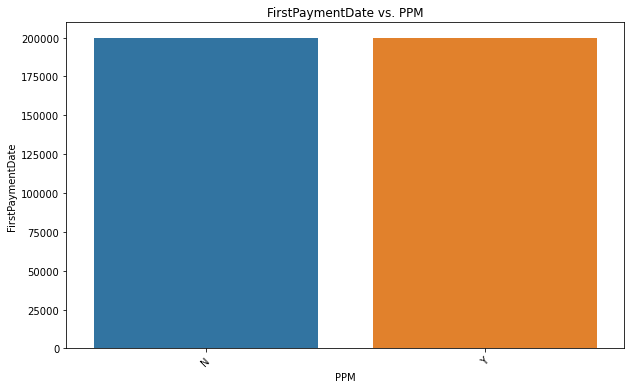

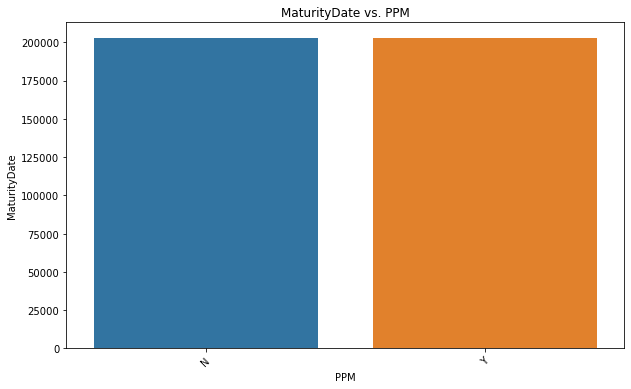

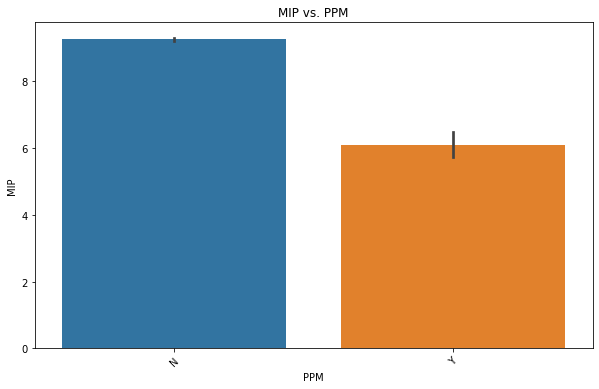

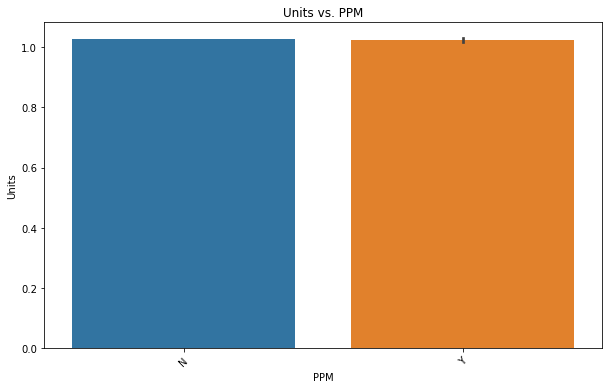

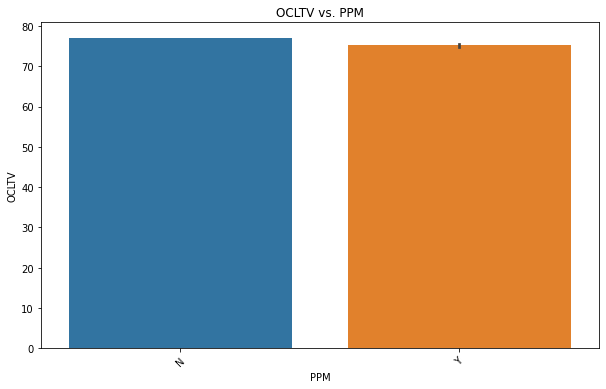

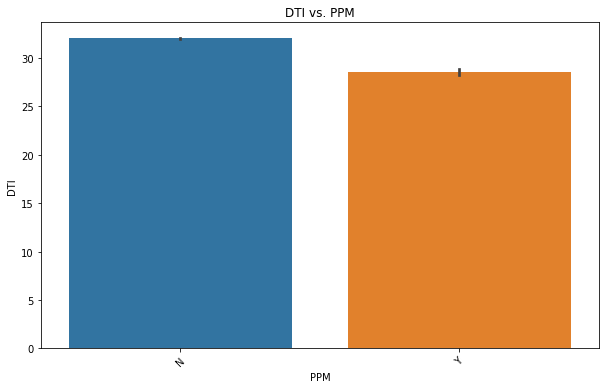

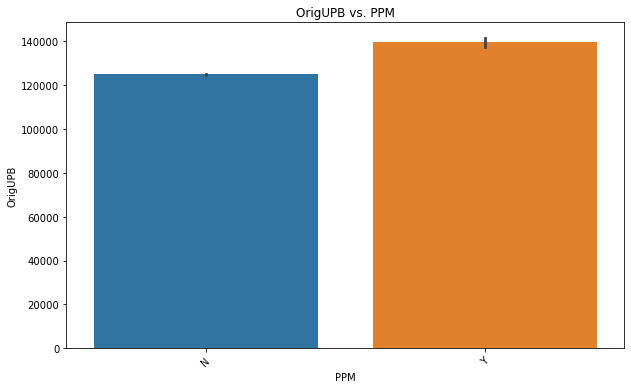

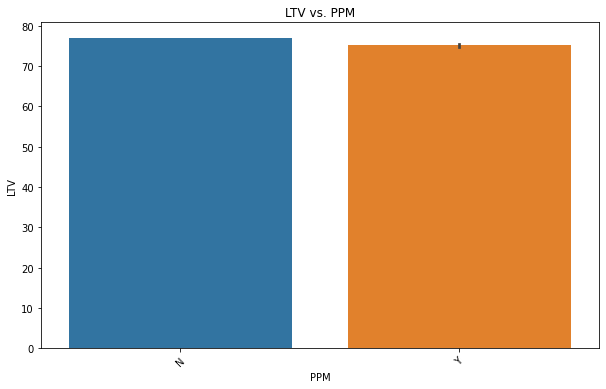

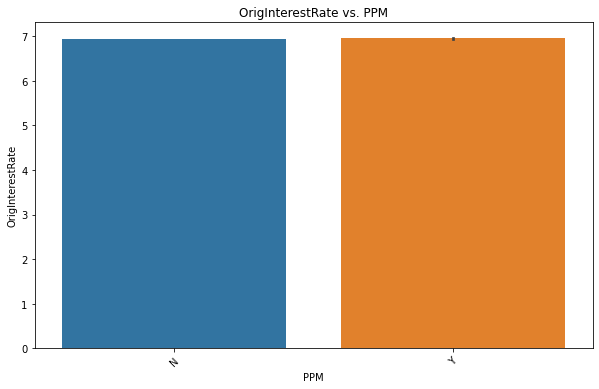

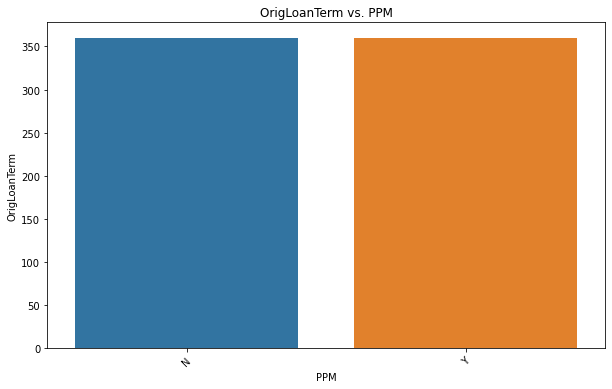

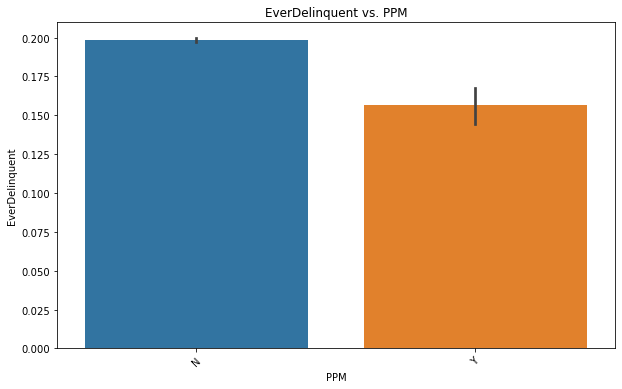

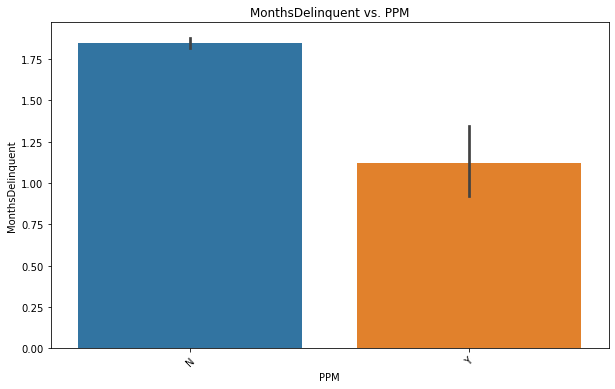

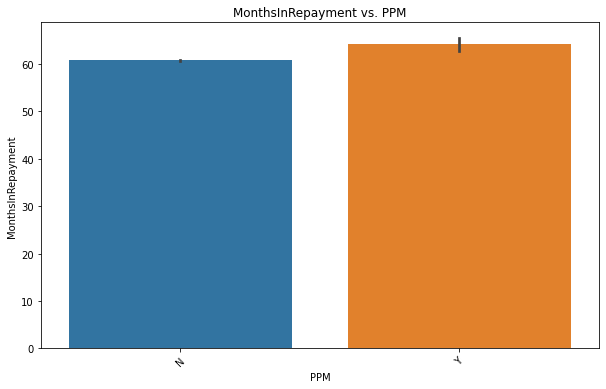

In [41]:
# Remove target column if it exists in the num list
if 'PPM' in num:
    num.remove('PPM')

# Loop through each numerical column and create a bar plot with target
for col in num:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='PPM', y=col, data=df)
    plt.title(f'{col} vs. PPM')
    plt.xlabel('PPM')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.show()


##### plot with categorical features

In [42]:
# to make the plots we will encode PPM column now to make it's values numeric 
df['PPM'] = df['PPM'].replace({'Y': 1, 'N': 0})

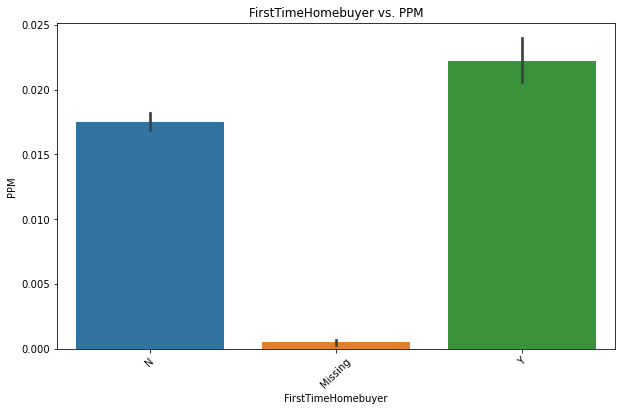

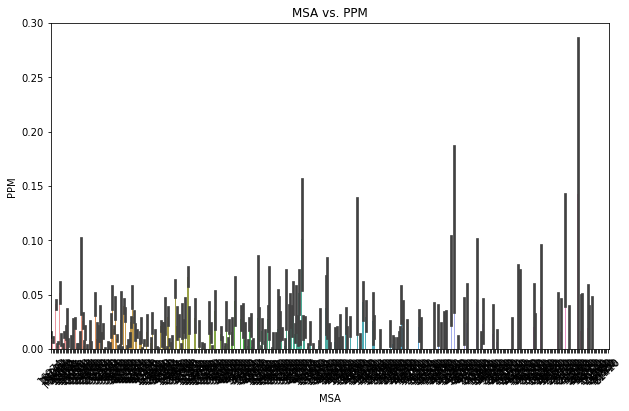

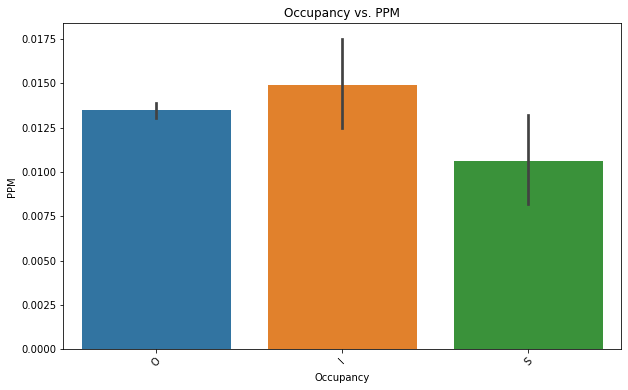

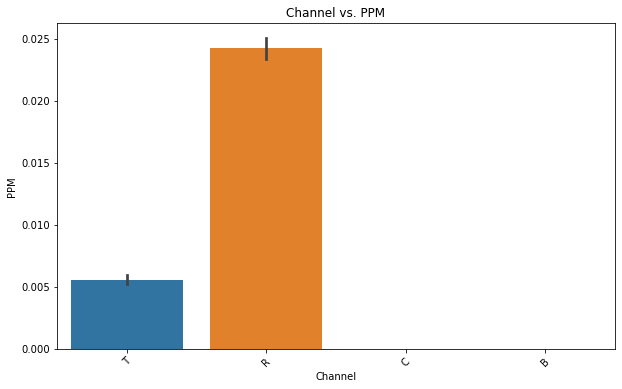

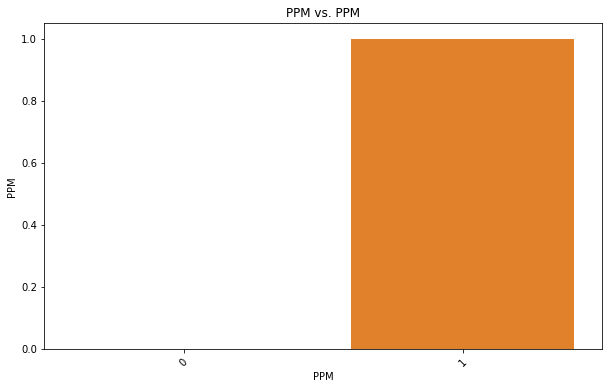

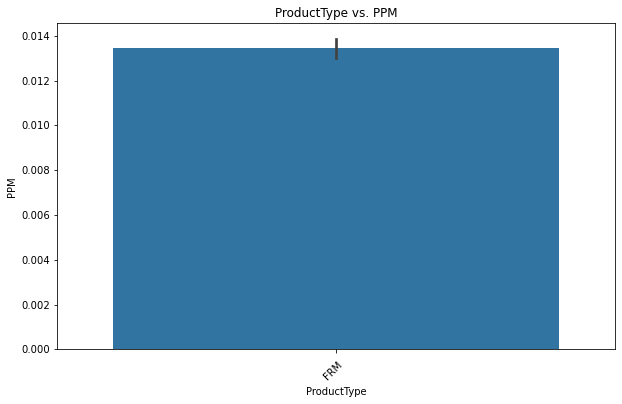

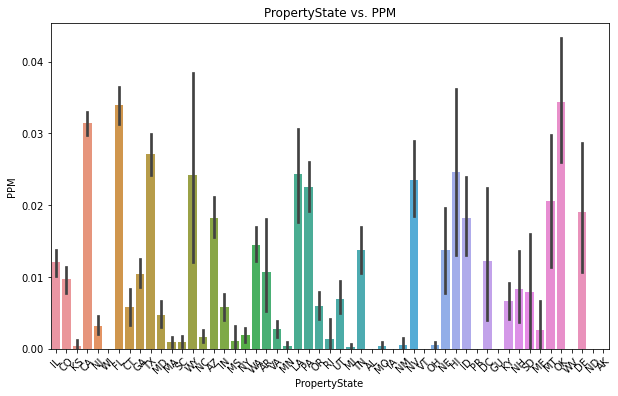

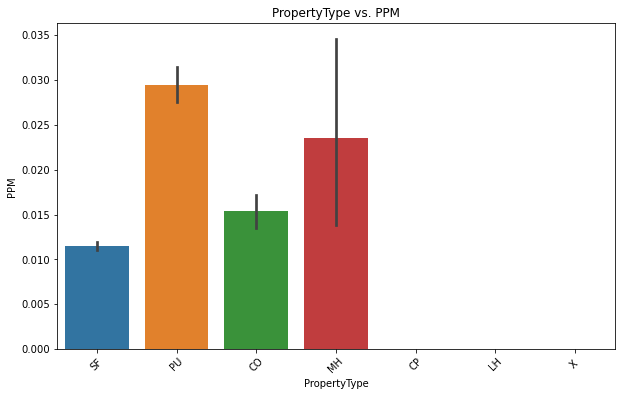

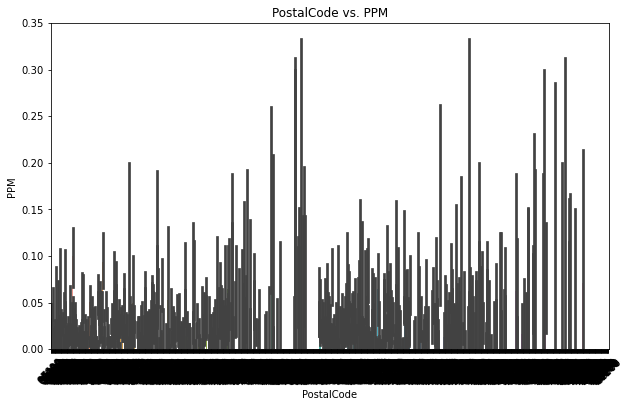

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001FE310C69D0> (for post_execute):


KeyboardInterrupt: 

In [43]:
# Loop through each categorical column and create bar plots
for col in cat:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y='PPM', data=df)
    plt.title(f'{col} vs. PPM')
    plt.xlabel(col)
    plt.ylabel('PPM')
    plt.xticks(rotation=45)
    plt.show()


##### each one of these plots represent a proportion of occurrences where the 'PPM' value is 1 

### Dimensionality Reduction

##### Convert Dates

In [44]:
# convert the columns to Period format
df['FirstPaymentDate'] = pd.to_datetime(df['FirstPaymentDate'], format='%Y%m').dt.to_period('M')
df['MaturityDate'] = pd.to_datetime(df['MaturityDate'], format='%Y%m').dt.to_period('M')

# convert the PeriodDtype column to a Timestamp column
df['FirstPaymentDate'] = df['FirstPaymentDate'].dt.to_timestamp()
df['MaturityDate'] = df['MaturityDate'].dt.to_timestamp()

# print the resulting dataframe
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,711.841009,1999-02-01,N,2029-01-01,16974,25,1,O,89.0,27.0,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,711.841009,1999-02-01,N,2029-01-01,19740,0,1,O,73.0,17.0,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,711.841009,1999-02-01,N,2029-01-01,29940,0,1,O,75.0,16.0,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,711.841009,1999-02-01,N,2029-01-01,31084,0,1,O,76.0,14.0,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,711.841009,1999-02-01,N,2029-01-01,35644,0,1,O,78.0,18.0,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [45]:
# drop unwanted columns 
df.drop(['SellerName','ProductType','LoanSeqNum', 'LTV'], axis =1, inplace= True)

In [46]:
#derive new column
df['PropertyLocation'] = df['PropertyState'] + ' ' + df['PostalCode'].astype(str)

# drop original columns
df.drop(['PropertyState', 'PostalCode'], axis =1, inplace= True)


In [47]:
df['PropertyLocation'].unique()

array(['IL 60400', 'CO 80200', 'KS 66000', 'CA 90700', 'NJ 7600',
       'CO 80400', 'WI 53100', 'FL 32800', 'CT 6400', 'KS 67000',
       'GA 30100', 'GA 30000', 'GA 30600', 'GA 30200', 'GA 30300',
       'TX 78700', 'TX 77700', 'MD 20800', 'MA 1800', 'SC 29400',
       'WY 82000', 'IL 60000', 'IL 60200', 'IL 60600', 'IL 60100',
       'SC 29000', 'TX 75200', 'NC 27500', 'NJ 7700', 'TX 79900',
       'AZ 86000', 'FL 33300', 'FL 33000', 'IN 46800', 'TX 76100',
       'NC 27400', 'SC 29600', 'MS 39500', 'CT 6100', 'IN 46000',
       'NY 14800', 'MS 39100', 'FL 32200', 'WA 99300', 'AR 72200',
       'CA 91300', 'CA 91700', 'VA 24500', 'FL 33100', 'WI 53000',
       'MN 55300', 'MN 55400', 'SC 29500', 'NY 11900', 'NJ 7000',
       'NJ 7900', 'LA 70000', 'NJ 7400', 'NY 11400', 'AZ 85200',
       'AZ 85300', 'PA 15000', 'OR 97200', 'OR 97000', 'RI 2800',
       'MA 2000', 'UT 84000', 'CA 96000', 'VA 23200', 'CA 92200',
       'CA 92800', 'CA 95600', 'CA 95800', 'IL 62200', 'TX 78200',
     

##### Handling Outliers

In [48]:
# columns that contains noticable outliers 
selected_cols = ['OrigUPB', 'CreditScore', 'OCLTV', 'OrigLoanTerm', 'MonthsInRepayment']


# calculate Q1, Q3, and IQR for each numeric column
Q1 = df[selected_cols].quantile(0.25)
Q3 = df[selected_cols].quantile(0.80)
IQR = Q3 - Q1

# define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# identify outliers for each column
outliers = ((df[selected_cols] < lower_bound) | (df[selected_cols] > upper_bound)).any(axis=1)

# replace outliers with the respective quantile values
df.loc[outliers, selected_cols] = df[selected_cols].quantile([0.25, 0.80])

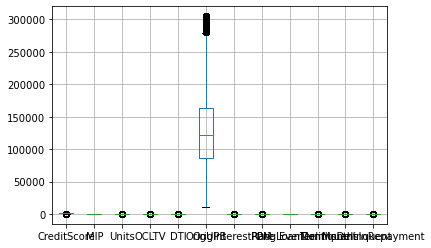

In [49]:
df.boxplot()
plt.show()

### Encoding 

##### Label Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder

label_encoder = preprocessing.LabelEncoder()


# encode Occupancy
df['Occupancy']= label_encoder.fit_transform(df['Occupancy'])

# encode Channel
df['Channel']= label_encoder.fit_transform(df['Channel'])

# encode PropertyType
df['PropertyType']= label_encoder.fit_transform(df['PropertyType'])


#encode LoanPurpose
df['LoanPurpose']= label_encoder.fit_transform(df['LoanPurpose'])

In [51]:
# Convert NumBorrowers into numeric column
df['NumBorrowers'] = df['NumBorrowers'].astype(float).astype(int)

#### Frequency Encoding

In [52]:
# For MSA column
msa_counts = df['MSA'].value_counts()
msa_freq = msa_counts.to_dict()
df['MSA_freq'] = df['MSA'].transform(lambda x: msa_freq.get(x))

# For ServicerName
servicer_counts = df['ServicerName'].value_counts()
servicer_freq = servicer_counts.to_dict()
df['ServicerName_freq'] = df['ServicerName'].transform(lambda x: servicer_freq.get(x))

# For PropertyLocation
location_counts = df['PropertyLocation'].value_counts()
location_freq = location_counts.to_dict()
df['PropertyLocation_freq'] = df['PropertyLocation'].transform(lambda x: location_freq.get(x))


In [53]:
# drop unwanted columns
df.drop(['MSA', 'ServicerName', 'PropertyLocation','FirstPaymentDate', 'MaturityDate'] , axis =1, inplace= True)


##### Other forms of encoding

In [54]:
# replace Y with 1 and N with 0 in FirstTimeHomebuyer
df['FirstTimeHomebuyer'] = df['FirstTimeHomebuyer'].replace({'Y': 1, 'N': 0, 'Missing': 9})

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291446 entries, 0 to 291450
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CreditScore            252504 non-null  float64
 1   FirstTimeHomebuyer     291446 non-null  int64  
 2   MIP                    291446 non-null  int64  
 3   Units                  291446 non-null  int64  
 4   Occupancy              291446 non-null  int32  
 5   OCLTV                  252504 non-null  float64
 6   DTI                    291446 non-null  float64
 7   OrigUPB                252504 non-null  float64
 8   OrigInterestRate       291446 non-null  float64
 9   Channel                291446 non-null  int32  
 10  PPM                    291446 non-null  int64  
 11  PropertyType           291446 non-null  int32  
 12  LoanPurpose            291446 non-null  int32  
 13  OrigLoanTerm           252504 non-null  float64
 14  NumBorrowers           291446 non-nu

### Scailing 

In [56]:
# Convert all columns to float
df = df.astype(float)

In [57]:
from sklearn.preprocessing import MinMaxScaler

#copy of the original dataframe
df_scaled = df.copy()


# apply scaling to the desired columns
scale = MinMaxScaler()
scaled_values = scale.fit_transform(df)

# update the original dataframe with the scaled values
df.loc[:,:] = scaled_values

In [58]:
df

,CreditScore,FirstTimeHomebuyer,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,OrigInterestRate,Channel,...,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,MSA_freq,ServicerName_freq,PropertyLocation_freq
0,0.538185,0.0,0.454545,0.25,0.5,0.700000,0.406250,0.362712,0.329341,1.000000,...,0.833333,1.0,0.0,1.0,0.0,0.0,0.383459,0.224314,0.308933,0.456689
1,NaN,0.0,0.000000,0.25,0.5,NaN,0.250000,NaN,0.299401,0.666667,...,0.833333,0.5,NaN,0.0,0.0,0.0,NaN,0.141545,0.021491,0.510993
2,0.538185,0.0,0.000000,0.25,0.5,0.500000,0.234375,0.264407,0.344311,1.000000,...,0.833333,0.5,0.0,1.0,0.0,0.0,0.496241,0.001918,0.308933,0.121060
3,0.538185,0.0,0.000000,0.25,0.5,0.514286,0.203125,0.508475,0.344311,0.666667,...,0.833333,0.5,0.0,1.0,0.0,0.0,0.255639,0.238816,0.124291,0.198146
4,0.538185,0.0,0.000000,0.25,0.5,0.542857,0.265625,0.335593,0.374251,0.666667,...,0.833333,0.5,0.0,1.0,0.0,0.0,0.398496,0.106223,0.124291,0.103311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,0.966330,0.0,0.000000,0.25,0.5,0.285714,0.484375,0.271186,0.359281,0.666667,...,0.833333,0.5,0.0,1.0,0.0,0.0,0.082707,0.066808,1.000000,0.139603
291447,NaN,0.0,0.000000,0.25,0.5,NaN,0.484165,NaN,0.284431,0.333333,...,0.833333,1.0,NaN,1.0,0.0,0.0,NaN,0.106223,1.000000,0.005828
291448,NaN,0.0,0.000000,0.25,0.5,NaN,0.468750,NaN,0.194611,0.666667,...,0.833333,0.5,NaN,0.0,0.0,0.0,NaN,0.129115,1.000000,0.465430
291449,0.986532,0.0,0.000000,0.25,0.0,0.571429,0.828125,0.264407,0.359281,0.666667,...,0.833333,1.0,0.0,1.0,0.0,0.0,0.233083,0.066808,1.000000,0.113377


### Multivariate Analysis

### Multiple Linear Regression

Mean Squared Error: 0.01
Mean Absolute Error: 0.03
R-squared Score: 0.02


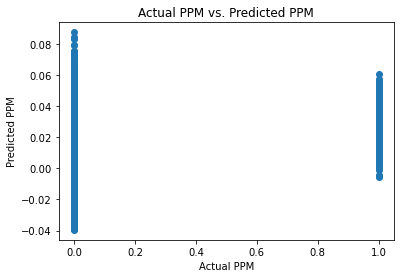

In [61]:
# Split the dataset into features and target variable
X = df.drop(columns=['PPM'])
y = df['PPM']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared Score: {r2:.2f}')


# Plot the output
plt.scatter(y_test, y_pred)
plt.xlabel('Actual PPM')
plt.ylabel('Predicted PPM')
plt.title('Actual PPM vs. Predicted PPM')
plt.show()

Based on the output it seems that the target variable is not explained enough by the independebt variables the R-squared value suggests that the model may not be capturing the underlying relationships well and has limited predictive power 

### Multiple Logistic Regression

In [64]:
# Split the dataset into features and target variable
X = df.drop(columns=['PPM'])
y = df['PPM']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the multiple Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make prediction 
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', confusion_matrix)
print('Classification Report:\n', classification_report)

Accuracy: 0.7397959183673469
Confusion Matrix:
 [[480 226]
 [131 535]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.68      0.73       706
         1.0       0.70      0.80      0.75       666

    accuracy                           0.74      1372
   macro avg       0.74      0.74      0.74      1372
weighted avg       0.75      0.74      0.74      1372



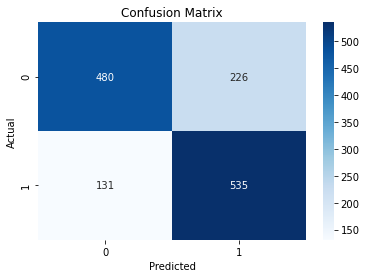

In [65]:
# Create a heatmap of the confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

the accuracy is high but  it's important to consider the class imbalance in the data, as the majority class (0) is much larger than the minority class (1) as the model has correctly classified a large number of instances from the majority class (0), with only 4 false positives, it did not predict any instances from the minority class (1) correctly, resulting in a high number of false negatives (782).

To solve imbalanced data techniques such as oversampling, undersampling, or using class weights can be considered to improve the model's performance which will be performed below

### Under Sampling Majority Class 

In [66]:
from imblearn.under_sampling import RandomUnderSampler

# Separate the features and the target variable
X = df.drop(columns=['PPM'])
y = df['PPM']

# Apply RandomUnderSampler to undersample the majority class
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)

## Feature Selection and Logistic Regression for Borrower Delinquency Prediction

In [67]:
# Feature selection
X = df.drop(columns=['EverDelinquent', 'MonthsDelinquent'])
y = df['EverDelinquent']
best_features = SelectKBest(score_func=chi2, k=10).fit(X, y)
feature_scores = pd.DataFrame(best_features.scores_, index=X.columns, columns=['Score'])
selected_features = feature_scores.nlargest(10, 'Score').index.tolist()
X = X[selected_features]


# Model training and evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8293895170392666


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252504 entries, 0 to 291450
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CreditScore            252504 non-null  float64
 1   FirstTimeHomebuyer     252504 non-null  float64
 2   MIP                    252504 non-null  float64
 3   Units                  252504 non-null  float64
 4   Occupancy              252504 non-null  float64
 5   OCLTV                  252504 non-null  float64
 6   DTI                    252504 non-null  float64
 7   OrigUPB                252504 non-null  float64
 8   OrigInterestRate       252504 non-null  float64
 9   Channel                252504 non-null  float64
 10  PPM                    252504 non-null  float64
 11  PropertyType           252504 non-null  float64
 12  LoanPurpose            252504 non-null  float64
 13  OrigLoanTerm           252504 non-null  float64
 14  NumBorrowers           252504 non-nu

## Principle Component Analysis (PCA)

In [69]:
pca = PCA()
plt.figure(figsize=(12,10))
Xt = pca.fit_transform(X)

# get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# get cumulative sum of explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# percentage of representation for each principal component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio*100:.2f}%")

Principal Component 1: 34.25%
Principal Component 2: 18.31%
Principal Component 3: 14.67%
Principal Component 4: 12.07%
Principal Component 5: 5.48%
Principal Component 6: 4.40%
Principal Component 7: 4.00%
Principal Component 8: 3.36%
Principal Component 9: 1.98%
Principal Component 10: 1.48%


<Figure size 864x720 with 0 Axes>

as it is shown we might choose the first 5 principle components to represent our data as it represents most of it

C:\Users\nsaad\anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


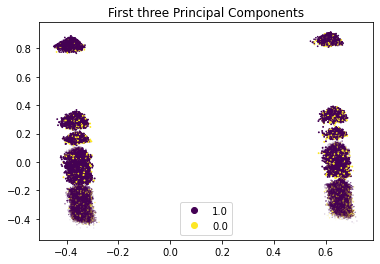

In [70]:
# Show the first three principal components in the scatter plot
plot = plt.scatter(Xt[:, 0], Xt[:, 1],Xt[:, 2], c=y)

# Define the class labels for the legend
class_labels = ['1.0', '0.0']

# include the first three principal components
plt.legend(handles=plot.legend_elements()[0], labels=class_labels)

plt.title("First three Principal Components")
plt.show()

C:\Users\nsaad\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:838: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
C:\Users\nsaad\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:840: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


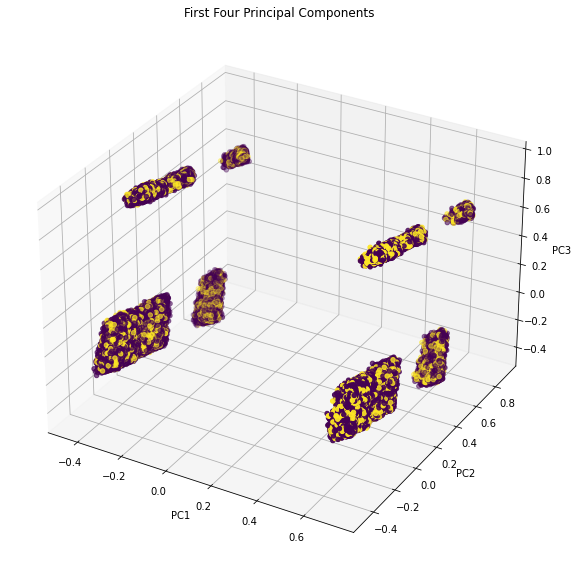

In [72]:
# show the first four principal components in the scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xt[:, 0], Xt[:, 1], Xt[:, 2], Xt[:, 3], c=y)

# include the first four principal components
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.title("First Four Principal Components")
plt.show()